# Data Cleaning New Data

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## Load Data

In [2]:
ecom_data_df = pd.read_csv("../dataset/processed/ecom_data.csv")

## Cleaning

In [3]:
missing_values = ecom_data_df.isnull().sum()
print(missing_values[missing_values > 0])

customer_zip_code_prefix         594
customer_city                    632
customer_state                   627
order_status                     668
order_purchase_timestamp         628
order_approved_at                639
order_delivered_carrier_date     768
order_delivered_customer_date    754
order_estimated_delivery_date    591
payment_sequential               578
payment_type                     614
payment_installments             613
payment_value                    589
order_item_id                    554
shipping_limit_date              605
product_category_name            736
product_name_lenght              658
product_description_lenght       762
product_photos_qty               846
product_weight_g                 686
product_length_cm                535
product_height_cm                522
product_width_cm                 523
dtype: int64


In [4]:
# fill information about customer with "N/A"
col_to_fills = ["customer_zip_code_prefix", "customer_city", "customer_state"]
ecom_data_df[col_to_fills] = ecom_data_df[col_to_fills].fillna("N/A")

print(ecom_data_df[col_to_fills].isnull().sum())

customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [5]:
# see unique value from product_name
print(ecom_data_df["product_category_name"].unique())
print(f"amount unique value: {ecom_data_df['product_category_name'].nunique()}")

['climatizacao' 'brinquedos' 'informatica_acessorios' 'beleza_saude'
 'telefonia' 'cama_mesa_banho' 'automotivo' 'eletroportateis'
 'casa_conforto' 'papelaria' 'pet_shop' 'esporte_lazer' 'artes'
 'fashion_bolsas_e_acessorios' 'perfumaria' 'instrumentos_musicais' nan
 'moveis_decoracao' 'relogios_presentes' 'eletronicos'
 'utilidades_domesticas' 'construcao_ferramentas_ferramentas'
 'industria_comercio_e_negocios' 'malas_acessorios' 'ferramentas_jardim'
 'cool_stuff' 'bebidas' 'eletrodomesticos' 'tablets_impressao_imagem'
 'pcs' 'consoles_games' 'construcao_ferramentas_construcao' 'bebes'
 'moveis_cozinha_area_de_servico_jantar_e_jardim' 'alimentos'
 'moveis_escritorio' 'livros_interesse_geral'
 'portateis_cozinha_e_preparadores_de_alimentos' 'telefonia_fixa'
 'eletrodomesticos_2' 'market_place' 'moveis_sala' 'dvds_blu_ray' 'audio'
 'casa_construcao' 'construcao_ferramentas_jardim' 'alimentos_bebidas'
 'fashion_calcados' 'agro_industria_e_comercio' 'musica'
 'artigos_de_natal' 'livros_t

In [6]:
# fill product_category_name with "unknown_category"
# fill information about customer with "N/A"
ecom_data_df["product_category_name"] = ecom_data_df["product_category_name"].fillna(
    "unknown_category"
)

print(ecom_data_df["product_category_name"].isnull().sum())

0


### CLEANING PRODUCT COLUMNS

An unexpected error occurred while plotting column 'product_weight_g': supplied range of [0.0, inf] is not finite
An unexpected error occurred while plotting column 'product_length_cm': supplied range of [0.0, inf] is not finite
An unexpected error occurred while plotting column 'product_height_cm': supplied range of [0.0, inf] is not finite
An unexpected error occurred while plotting column 'product_width_cm': supplied range of [0.0, inf] is not finite


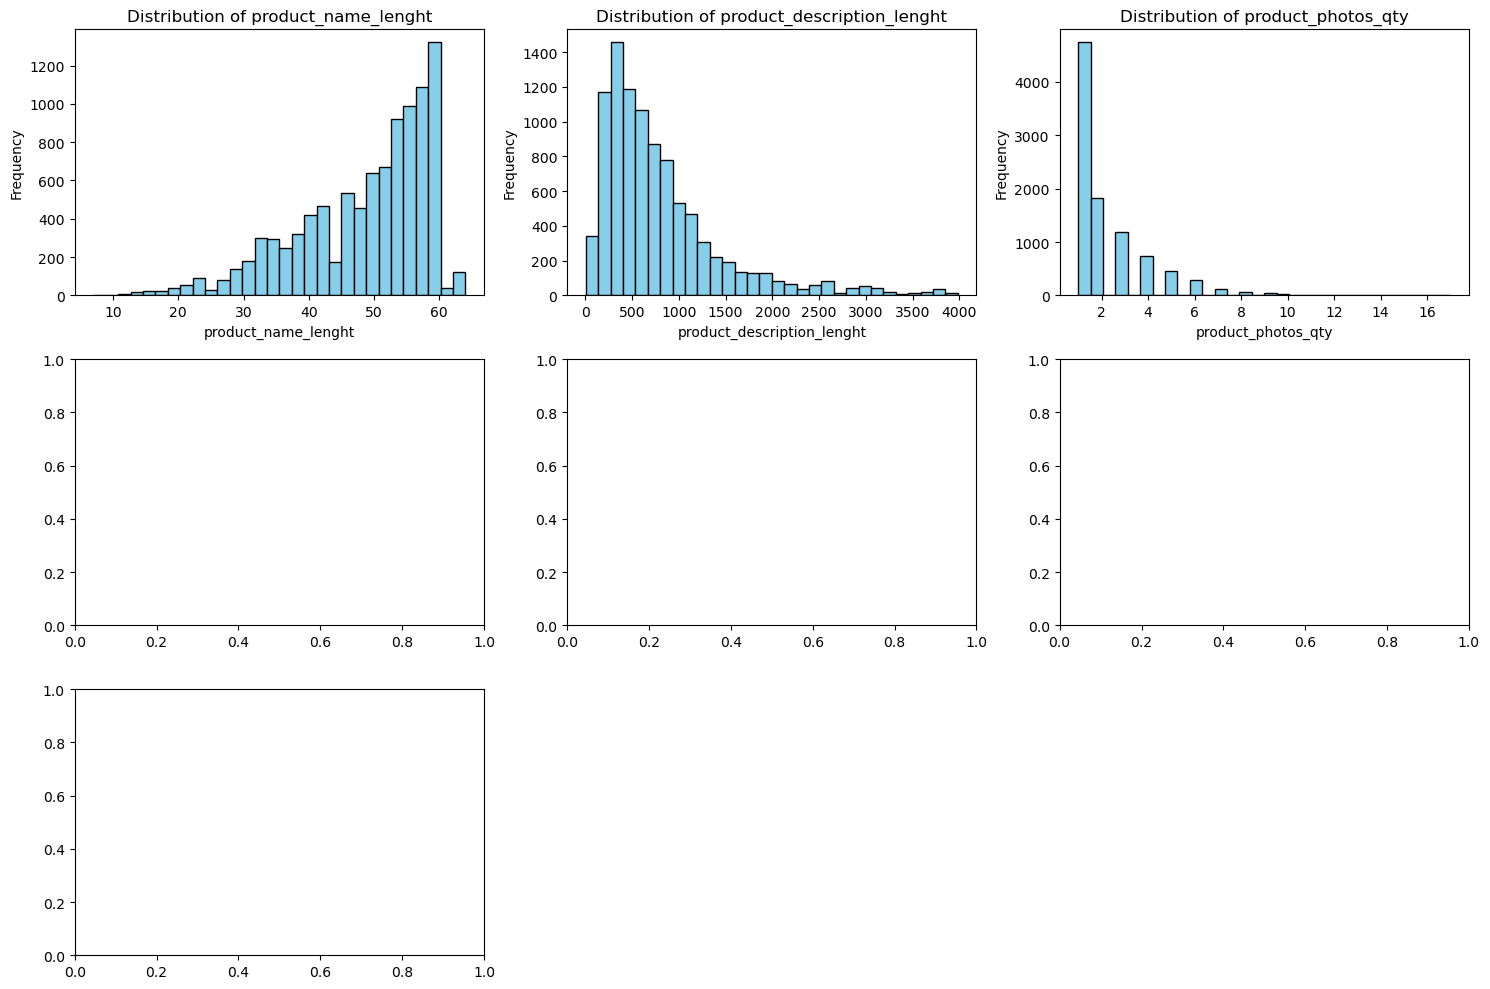

In [7]:
try:
    # make histogram for numerical product columns
    numerical_product_cols = [
        "product_name_lenght",
        "product_description_lenght",
        "product_photos_qty",
        "product_weight_g",
        "product_length_cm",
        "product_height_cm",
        "product_width_cm",
    ]
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
    axes = axes.flatten()

    for i, col in enumerate(numerical_product_cols):
        try:
            ax = axes[i]
            ax.hist(
                ecom_data_df[col].dropna(), bins=30, color="skyblue", edgecolor="black"
            )
            ax.set_title(f"Distribution of {col}")
            ax.set_xlabel(col)
            ax.set_ylabel("Frequency")
        except KeyError as e:
            print(
                f"Error: Column '{col}' not found in ecom_data_df. Skipping histogram for this column."
            )
        except AttributeError as e:
            print(
                f"Error: Attribute issue while plotting column '{col}'. Ensure ecom_data_df is a DataFrame and '{col}' is a valid column."
            )
        except IndexError as e:
            print(f"Error: Not enough subplots for column '{col}'.")
            break  # Stop the loop if there are no more subplots
        except Exception as e:
            print(f"An unexpected error occurred while plotting column '{col}': {e}")

    # Corrected way to handle extra subplots
    if len(numerical_product_cols) < len(axes):
        for i in range(len(numerical_product_cols), len(axes)):
            fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

except Exception as overall_e:
    print(
        f"An overall error occurred during the histogram plotting process: {overall_e}"
    )

CLEANING COLUMN `product_weight_g`

In [8]:
# check data type column "product_weight_g"
print(f"data type product_weight_g: {ecom_data_df['product_weight_g'].dtype}")
print(
    f"unique value product_weight_g: {ecom_data_df['product_weight_g'].unique()[:20]}"
)

data type product_weight_g: float64
unique value product_weight_g: [ 2000.   200.   650.  1067.   100.  2555.  2313.   800.    nan 17325.
   225.   150.   128.  1900.   378.   250.  5900.    50.   125.  1350.]


In [9]:
has_inf = np.isinf(ecom_data_df["product_weight_g"]).any()
print(f"is there positive infinite value in product_weight_g: {has_inf}")

has_neg_inf = np.isneginf(ecom_data_df["product_weight_g"]).any()
print(f"is there negative value in product_weight_g: {has_neg_inf}")

is there positive infinite value in product_weight_g: True
is there negative value in product_weight_g: False


In [10]:
# Hitung jumlah baris dengan nilai tak hingga positif di product_weight_g
jumlah_inf = np.isinf(ecom_data_df["product_weight_g"]).sum()
print(f"Number of rows with positive infinite values in product_weight_g: {jumlah_inf}")

Number of rows with positive infinite values in product_weight_g: 59


In [11]:
# remove infinite value from product_weight_g
ecom_data_df = ecom_data_df[~np.isinf(ecom_data_df["product_weight_g"])]

infi_after_removal = np.isinf(ecom_data_df["product_weight_g"]).sum()
print(f"number of infinite value after dropping: {infi_after_removal} data")

number of infinite value after dropping: 0 data


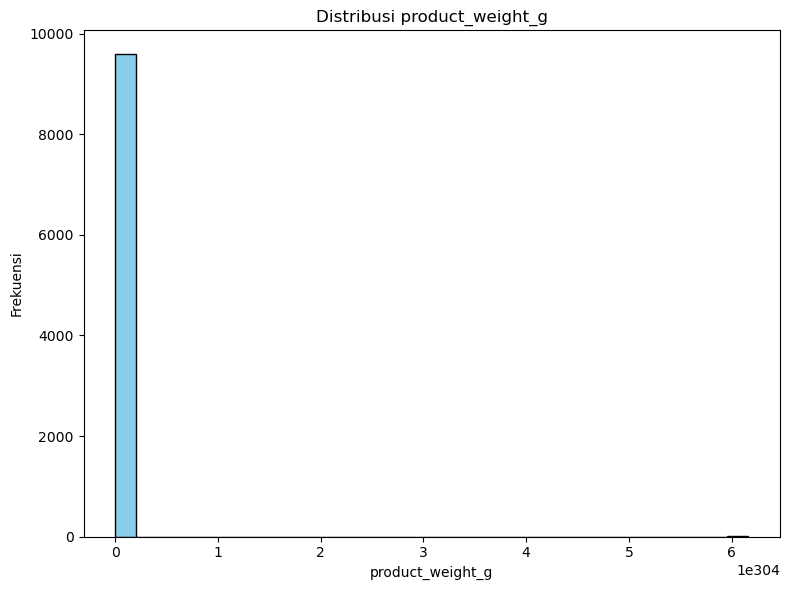

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(
    ecom_data_df["product_weight_g"].dropna(),
    bins=30,
    color="skyblue",
    edgecolor="black",
)
plt.title("Distribusi product_weight_g")
plt.xlabel("product_weight_g")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

CLEANING COLUMNS `product_name_lenght`, `product_description_lenght`, `product_photos_qty`,
                            `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`

In [13]:
# Kolom-kolom numerik terkait produk yang punya missing values
numerical_product_cols = [
    "product_name_lenght",
    "product_description_lenght",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
]

# Hitung median untuk setiap kolom
median_values = ecom_data_df[numerical_product_cols].median()
print(median_values)

ecom_data_df = ecom_data_df.fillna(median_values)

print(ecom_data_df[numerical_product_cols].isnull().sum())

product_name_lenght            52.0
product_description_lenght    603.0
product_photos_qty              1.0
product_weight_g              688.0
product_length_cm              25.0
product_height_cm              13.0
product_width_cm               20.0
dtype: float64
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [14]:
ecom_data_df[
    [
        "order_purchase_timestamp",
        "order_approved_at",
        "order_delivered_carrier_date",
        "order_delivered_customer_date",
        "order_estimated_delivery_date",
        "shipping_limit_date",
        "order_status",
    ]
].sample(5)

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,order_status
7847,2017-11-13 22:31:33,2017-11-13 22:50:38,2017-11-29 13:41:42,2017-11-30 17:42:00,2017-11-28 00:00:00,2017-11-20 22:50:38,delivered
6969,2018-06-05 23:30:25,2018-06-05 23:52:37,2018-06-06 15:31:00,2018-06-11 12:28:27,2018-07-18 00:00:00,2018-06-13 23:52:37,delivered
2999,2017-11-27 18:25:55,2017-11-28 03:21:19,2017-11-29 20:03:26,NaN,2017-12-11 00:00:00,2017-12-04 03:21:19,shipped
9169,2017-11-20 12:47:30,2017-11-20 13:07:03,2017-11-20 20:32:37,2017-11-29 15:58:37,2017-12-07 00:00:00,2017-11-24 13:07:03,NaN
6885,2018-02-19 14:12:58,2018-02-19 16:15:35,2018-02-21 20:27:11,2018-02-24 14:36:54,2018-03-13 00:00:00,2018-02-23 16:15:35,delivered


In [15]:
print(ecom_data_df["order_status"].unique())

[nan 'delivered' 'shipped' 'canceled' 'processing' 'invoiced']


### CLEANING COLUMN `ORDER_PURCHASE_TIMESTAMP` DATA

In [16]:
date_cols = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "shipping_limit_date",
]

for col in date_cols:
    try:
        ecom_data_df[col] = pd.to_datetime(ecom_data_df[col], errors="coerce")
        print(f"column: {col}. Success convert to datetime")
    except Exception as e:
        print(f"there is error or column {col} has been format to datetime: {e}")

column: order_purchase_timestamp. Success convert to datetime
column: order_approved_at. Success convert to datetime
column: order_delivered_carrier_date. Success convert to datetime
column: order_delivered_customer_date. Success convert to datetime
column: order_estimated_delivery_date. Success convert to datetime
column: shipping_limit_date. Success convert to datetime


In [17]:
try:
    ecom_data_df["order_purchase_timestamp"].fillna(
        ecom_data_df["order_approved_at"], inplace=True
    )
    print(
        "Number of null values in 'order_purchase_timestamp' after filling:",
        ecom_data_df["order_purchase_timestamp"].isnull().sum(),
    )
except KeyError as e:
    # Catch KeyError if either 'order_purchase_timestamp' or 'order_approved_at' column is not found
    print(
        f"Error: Column not found - {e}. Please ensure that the column exists in the DataFrame."
    )

except AttributeError as e:
    # Catch AttributeError if ecom_data_df is not a DataFrame or if the column is not a Series
    print(
        f"Error: Attribute issue - {e}. Please verify that 'ecom_data_df' is a pandas DataFrame and the column name is correct."
    )

except Exception as e:
    # Catch any other unexpected errors
    print(f"An unexpected error occurred: {e}")

Number of null values in 'order_purchase_timestamp' after filling: 31


/tmp/ipykernel_2925/3040813234.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ecom_data_df["order_purchase_timestamp"].fillna(


In [18]:
missing_date_timestamp = ecom_data_df[ecom_data_df["order_purchase_timestamp"].isnull()]

print(missing_date_timestamp["order_status"].value_counts())

order_status
delivered     28
processing     2
Name: count, dtype: int64


In [19]:
display(
    missing_date_timestamp[
        [
            "order_status",
            "order_delivered_carrier_date",
            "order_estimated_delivery_date",
        ]
    ]
)

,order_status,order_delivered_carrier_date,order_estimated_delivery_date
275,delivered,2017-09-12 19:29:38,2017-09-26
610,delivered,2018-05-28 13:34:00,2018-07-18
1344,delivered,2017-07-06 15:29:25,2017-07-27
1345,delivered,2017-07-06 15:29:25,2017-07-27
2154,delivered,NaT,2018-06-04
2401,delivered,2017-02-17 14:59:03,2017-03-14
2516,delivered,2018-06-26 14:52:00,2018-07-18
2741,delivered,2017-12-26 21:29:07,2018-01-29
3037,delivered,2017-12-06 17:53:11,2017-12-21
3256,delivered,2017-10-19 17:53:26,2017-11-22


In [20]:
# count time difference between order_delivered_carrier_date and order_purchase_timestamp
time_diif = (
    ecom_data_df["order_delivered_carrier_date"]
    - ecom_data_df["order_purchase_timestamp"]
)

# drop 'NaT' value
time_diif_no_nat = time_diif.dropna()

# count median
median_time_diff = time_diif_no_nat.median()

print(f"median between purchase and submission to courier: {median_time_diff}")

median between purchase and submission to courier: 2 days 05:06:23


In [21]:
# fill missing value in order_purchase_timestamp for status 'delivered'
delivered_mask = (ecom_data_df["order_status"] == "delivered") & (
    ecom_data_df["order_delivered_carrier_date"].notna()
)

ecom_data_df.loc[delivered_mask, "order_purchase_timestamp"] = (
    ecom_data_df.loc[delivered_mask, "order_delivered_carrier_date"] - median_time_diff
)

print(
    f"number of missing values in 'order_purchase_timestamp' after cleaning stage 2: {ecom_data_df['order_purchase_timestamp'].isnull().sum()} rows"
)

number of missing values in 'order_purchase_timestamp' after cleaning stage 2: 5 rows


In [22]:
remaining_missing_purchase = ecom_data_df[
    ecom_data_df["order_purchase_timestamp"].isnull()
]

# Hitung jumlah kemunculan setiap order_status di baris-baris tersebut (termasuk NaN jika ada)
print(remaining_missing_purchase["order_status"].value_counts(dropna=False))
display(
    remaining_missing_purchase[
        ["order_purchase_timestamp", "order_delivered_carrier_date", "order_status"]
    ]
)

order_status
delivered     2
processing    2
NaN           1
Name: count, dtype: int64


,order_purchase_timestamp,order_delivered_carrier_date,order_status
2154,NaT,NaT,delivered
3469,NaT,NaT,processing
3470,NaT,NaT,processing
3812,NaT,NaT,delivered
8880,NaT,2018-06-11 13:47:00,NaN


In [23]:
# Hitung selisih waktu antara shipping_limit_date dan order_purchase_timestamp
time_diff_ship_limit = (
    ecom_data_df["shipping_limit_date"] - ecom_data_df["order_purchase_timestamp"]
)

# Buang nilai NaT
time_diff_ship_limit_not_na = time_diff_ship_limit.dropna()

# Hitung median selisih waktu
median_time_diff_ship_limit = time_diff_ship_limit_not_na.median()

print(
    f"Median selisih waktu antara pembelian dan batas pengiriman: {median_time_diff_ship_limit}"
)

Median selisih waktu antara pembelian dan batas pengiriman: 5 days 16:07:56.500000


In [24]:
# Identifikasi baris di mana order_purchase_timestamp masih null
remaining_missing_mask = ecom_data_df["order_purchase_timestamp"].isnull()
remaining_missing_df = ecom_data_df[remaining_missing_mask].copy()

print("Status order untuk baris yang masih missing order_purchase_timestamp:")
print(remaining_missing_df["order_status"].value_counts(dropna=False))

Status order untuk baris yang masih missing order_purchase_timestamp:
order_status
delivered     2
processing    2
NaN           1
Name: count, dtype: int64


In [25]:
delivered_no_carrier_mask_remaining = (
    remaining_missing_df["order_status"] == "delivered"
) & (remaining_missing_df["order_delivered_carrier_date"].isna())

remaining_missing_df.loc[
    delivered_no_carrier_mask_remaining, "order_purchase_timestamp"
] = (
    remaining_missing_df.loc[
        delivered_no_carrier_mask_remaining, "order_estimated_delivery_date"
    ]
    - median_time_diff
)

In [26]:
processing_mask_remaining = remaining_missing_df["order_status"] == "processing"
remaining_missing_df.loc[processing_mask_remaining, "order_purchase_timestamp"] = (
    remaining_missing_df.loc[processing_mask_remaining, "shipping_limit_date"]
    - median_time_diff_ship_limit
)

In [27]:
# Update nilai order_purchase_timestamp di DataFrame utama dengan nilai yang sudah diisi
ecom_data_df.loc[remaining_missing_mask, "order_purchase_timestamp"] = (
    remaining_missing_df["order_purchase_timestamp"]
)

print(
    f"\nJumlah missing values di 'order_purchase_timestamp' setelah semua tahap pengisian: {ecom_data_df['order_purchase_timestamp'].isnull().sum()}"
)


Jumlah missing values di 'order_purchase_timestamp' setelah semua tahap pengisian: 1


In [28]:
nan_status_row = ecom_data_df[ecom_data_df["order_status"].isnull()]
print("\nDetail baris dengan order_status NaN:")
display(
    nan_status_row[
        [
            "order_purchase_timestamp",
            "order_approved_at",
            "order_delivered_carrier_date",
            "order_delivered_customer_date",
            "order_estimated_delivery_date",
            "shipping_limit_date",
        ]
    ].sample(20)
)


Detail baris dengan order_status NaN:


,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date
132,2018-07-10 17:52:57,2018-07-10 20:31:01,2018-07-12 13:23:00,2018-07-16 13:51:39,2018-07-27,2018-07-16 18:06:38
5039,2017-09-11 22:36:52,2017-09-11 22:45:26,2017-09-21 20:13:58,2017-10-01 15:04:07,2017-10-04,2017-09-20 22:45:26
1899,2017-09-15 21:09:57,2017-09-15 21:24:44,2017-09-18 21:47:37,2017-10-09 20:08:04,2017-10-10,2017-09-20 21:24:44
4153,2017-08-09 23:05:57,2017-08-09 23:24:29,2017-08-10 21:51:52,2017-08-16 19:55:34,NaT,2017-08-15 23:24:29
7863,2018-01-13 06:50:03,NaT,2018-01-19 17:48:32,2018-01-22 20:19:34,2018-01-30,2018-01-18 08:09:25
2051,2018-08-04 09:45:18,2018-08-04 09:45:18,2018-08-06 14:28:00,2018-08-09 21:05:48,2018-08-16,2018-08-09 09:45:18
240,2018-05-11 13:08:50,2018-05-12 03:32:28,2018-05-14 14:28:00,2018-05-17 22:51:04,2018-05-29,2018-05-17 03:30:25
6198,2018-07-31 15:08:53,2018-07-31 16:31:39,2018-08-02 12:53:00,2018-08-03 12:02:47,2018-08-08,2018-08-07 16:04:24
8768,2017-12-01 20:07:31,2017-12-01 20:14:24,2017-12-05 17:12:54,2017-12-18 10:47:11,2017-12-26,2017-12-07 20:14:24
107,2018-03-26 17:58:33,2018-03-26 18:10:23,2018-03-28 20:26:44,2018-04-30 21:05:18,2018-04-16,2018-03-30 18:10:23


In [29]:
missing_final = ecom_data_df[ecom_data_df["order_purchase_timestamp"].isnull()]
print(missing_final["order_status"].value_counts(dropna=False))

order_status
NaN    1
Name: count, dtype: int64


In [30]:
# 1. fill empty ‘delivered’ order with order_purchase_timestamp mode
mode_purchase_timestamp = ecom_data_df["order_purchase_timestamp"].mode()[0]
delivered_final_mask = (ecom_data_df["order_status"] == "delivered") & (
    ecom_data_df["order_purchase_timestamp"].isnull()
)
ecom_data_df.loc[delivered_final_mask, "order_purchase_timestamp"] = (
    mode_purchase_timestamp
)

In [31]:
nan_status_missing_purchase = ecom_data_df[
    (ecom_data_df["order_status"].isnull())
    & (ecom_data_df["order_purchase_timestamp"].isnull())
]

print(
    f"\nJumlah missing values di 'order_purchase_timestamp' setelah semua tahap pengisian: {ecom_data_df['order_purchase_timestamp'].isnull().sum()}"
)

display(
    nan_status_missing_purchase[
        [
            "order_purchase_timestamp",
            "order_approved_at",
            "order_delivered_carrier_date",
            "order_delivered_customer_date",
            "order_estimated_delivery_date",
            "shipping_limit_date",
        ]
    ]
)


Jumlah missing values di 'order_purchase_timestamp' setelah semua tahap pengisian: 1


,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date
8880,NaT,NaT,2018-06-11 13:47:00,2018-06-14 16:46:36,NaT,2018-06-14 11:15:22


In [32]:
median_time_diff = pd.Timedelta(days=2, hours=5, minutes=6, seconds=23)
index_to_fill = 8880
nan_status_missing_purchase_mask = ecom_data_df[
    (ecom_data_df["order_status"].isnull())
    & (ecom_data_df["order_purchase_timestamp"].isnull())
]

# fill order_status by reduce order_delivered_carrier_date with median difference time
ecom_data_df.loc[index_to_fill, "order_purchase_timestamp"] = (
    ecom_data_df.loc[index_to_fill, "order_delivered_carrier_date"] - median_time_diff
)

print(
    f"The number of missing values in order_purchase_timestamp after the last fill: {ecom_data_df['order_purchase_timestamp'].isnull().sum()}"
)

The number of missing values in order_purchase_timestamp after the last fill: 0


In [33]:
display(ecom_data_df.loc[[index_to_fill]])

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8880,5f2cfa9c8c34ab5d785fbf253c63b930,ce53d0436a0b5d49e67638cb97d715fb,9130.0,santo andre,SP,214a42323dd7ec45504d319315a1386b,NaN,2018-06-09 08:40:37,NaT,2018-06-11 13:47:00,2018-06-14 16:46:36,NaT,1.0,credit_card,1.0,NaN,1.0,79b34bfd104ba0110090a32b86572944,3968920b9aa752ab98f7d5888c9252f2,2018-06-14 11:15:22,72.0,11.51,papelaria,30.0,672.0,1.0,1050.0,30.0,30.0,30.0


### CLEANING COLUMN `order_approved_at` DATA	

In [34]:
print(
    f"total missing value in 'order_approved_at': {ecom_data_df['order_approved_at'].isnull().sum()}"
)

total missing value in 'order_approved_at': 636


In [35]:
missing = ecom_data_df[ecom_data_df["order_approved_at"].isnull()]
display(missing["order_status"].value_counts(dropna=False))

order_status
delivered     585
NaN            47
shipped         2
processing      2
Name: count, dtype: int64

In [36]:
delivered_missing_approval = ecom_data_df[
    (ecom_data_df["order_status"] == "delivered")
    & (ecom_data_df["order_approved_at"].isnull())
]

display(
    delivered_missing_approval[
        [
            "order_purchase_timestamp",
            "order_delivered_carrier_date",
            "order_delivered_customer_date",
            "order_estimated_delivery_date",
        ]
    ].head()
)

print(
    f"number of rows data that fulfill the conditions: {len(delivered_missing_approval)}"
)

,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
48,2017-06-25 06:43:54,2017-06-27 11:50:17,2017-07-11 16:21:52,2017-08-02
58,2017-04-17 05:59:44,2017-04-19 11:06:07,2017-05-09 22:28:02,2017-05-19
64,2017-07-17 09:59:26,2017-07-19 15:05:49,2017-07-26 01:36:42,2017-08-10
146,2018-04-24 09:38:37,2018-04-26 14:45:00,2018-05-09 23:26:33,2018-05-11
155,2017-06-04 04:59:49,2017-06-06 10:06:12,2017-06-13 16:04:54,NaT


number of rows data that fulfill the conditions: 585


In [37]:
# calculate difference
approved_purchase_diff = (
    ecom_data_df["order_approved_at"] - ecom_data_df["order_purchase_timestamp"]
)

# remove NaN
approved_purchase_diff = approved_purchase_diff.dropna()

# filter data date just for positive date only and remove negative date
approved_purchase_diff = approved_purchase_diff[
    approved_purchase_diff >= pd.Timedelta(0)
]

# get median date
approved_purchase_diff = approved_purchase_diff.median()
print(
    f"Median between order_approved_at and order_purchase_timestamp : {approved_purchase_diff}"
)

Median between order_approved_at and order_purchase_timestamp : 1 days 01:55:57


In [38]:
# fill missing value in order_approved_at with median for status "delivered"
delivered_missing_approval_mask = (ecom_data_df["order_status"] == "delivered") & (
    ecom_data_df["order_approved_at"].isnull()
)
ecom_data_df.loc[delivered_missing_approval_mask, "order_approved_at"] = (
    ecom_data_df.loc[delivered_missing_approval_mask, "order_purchase_timestamp"]
    - approved_purchase_diff
)

In [39]:
print(
    f"Number of missing values in 'order_approved_at' after filling stage 1: {ecom_data_df['order_approved_at'].isnull().sum()}"
)

Number of missing values in 'order_approved_at' after filling stage 1: 51


In [40]:
missing_approval_date_order_at = ecom_data_df[
    ecom_data_df["order_approved_at"].isnull()
]

display(
    missing_approval_date_order_at[
        ["order_approved_at", "order_purchase_timestamp", "order_status"]
    ]
)

,order_approved_at,order_purchase_timestamp,order_status
157,NaT,2018-08-06 19:57:44.000,NaN
384,NaT,2018-04-26 18:20:56.000,NaN
612,NaT,2017-03-07 18:09:43.000,NaN
1285,NaT,2018-01-13 03:18:30.000,NaN
1351,NaT,2017-09-14 20:27:07.000,NaN
1364,NaT,2017-05-05 09:01:37.000,NaN
1650,NaT,2018-06-03 10:59:51.000,NaN
1688,NaT,2018-03-22 17:36:46.000,NaN
1912,NaT,2018-03-24 16:43:58.000,NaN
2082,NaT,2017-09-11 12:58:44.000,NaN


In [41]:
print(f"Data type approved_purchase_diff: {type(approved_purchase_diff)}")
print(
    f"Data type ecom_data_df['order_approved_at']: {ecom_data_df['order_approved_at'].dtype}"
)

Data type approved_purchase_diff: <class 'pandas._libs.tslibs.timedeltas.Timedelta'>
Data type ecom_data_df['order_approved_at']: datetime64[ns]


In [42]:
nan_status_mask = (ecom_data_df["order_status"].isnull()) & (
    ecom_data_df["order_approved_at"].isnull()
)
ecom_data_df.loc[nan_status_mask, "order_approved_at"] = (
    ecom_data_df.loc[nan_status_mask, "order_purchase_timestamp"]
    + approved_purchase_diff
)

In [43]:
shipped_status_mask = (ecom_data_df["order_status"] == "shipped") & (
    ecom_data_df["order_approved_at"].isnull()
)
ecom_data_df.loc[shipped_status_mask, "order_approved_at"] = (
    ecom_data_df.loc[shipped_status_mask, "order_purchase_timestamp"]
    + approved_purchase_diff
)

In [44]:
processing_status_mask = (ecom_data_df["order_status"] == "processing") & (
    ecom_data_df["order_approved_at"].isnull()
)
ecom_data_df.loc[processing_status_mask, "order_approved_at"] = (
    ecom_data_df.loc[processing_status_mask, "order_purchase_timestamp"]
    + approved_purchase_diff
)

In [45]:
print(
    f"numbers missing values in 'order_approved_at' after filling: {ecom_data_df['order_approved_at'].isnull().sum()}"
)

numbers missing values in 'order_approved_at' after filling: 0


### CLEANING COLUMN `order_delivered_carrier_date`

In [46]:
# calculate missing value
print(
    f"missing value in column 'order_delivered_carrier_date': {ecom_data_df['order_delivered_carrier_date'].isnull().sum()}"
)

missing value in column 'order_delivered_carrier_date': 762


In [47]:
missing_carrier_df = ecom_data_df[ecom_data_df["order_delivered_carrier_date"].isnull()]

print(missing_carrier_df["order_status"].value_counts(dropna=False))

order_status
delivered     607
NaN            59
canceled       39
invoiced       29
processing     27
shipped         1
Name: count, dtype: int64


In [48]:
# print(f"Tipe data dari median_approved_purchase_diff: {type(median_approved_purchase_diff)}")
print(f"Tipe data: {ecom_data_df['order_status'].dtype}")
print(f"Tipe data: {ecom_data_df['order_delivered_carrier_date'].dtype}")

Tipe data: object
Tipe data: datetime64[ns]


In [49]:
delivered_missing_carrier = ecom_data_df[
    (ecom_data_df["order_status"] == "delivered")
    & (ecom_data_df["order_delivered_carrier_date"].isnull())
]

In [50]:
display(
    delivered_missing_carrier[
        [
            "order_purchase_timestamp",
            "order_approved_at",
            "order_delivered_customer_date",
            "order_estimated_delivery_date",
        ]
    ].head()
)

print(f"number rows that fulfill the condition: {len(delivered_missing_carrier)}")

,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date
1,2018-03-12 13:07:03,2018-03-12 13:15:28,2018-03-22 18:28:55,2018-03-29
73,2018-01-15 17:24:30,2018-01-15 17:34:30,2018-01-26 14:42:28,2018-02-06
115,2018-05-16 19:47:11,2018-05-16 20:16:17,2018-05-22 17:21:59,2018-06-04
127,2018-08-04 09:05:11,2018-08-04 09:05:11,2018-08-16 21:08:46,2018-09-04
173,2017-09-27 08:56:52,2017-09-26 07:00:55,2017-09-28 21:27:36,2017-10-13


number rows that fulfill the condition: 607


In [51]:
# Get median date between order_delivered_carrier_date and order_approved_at
approved_carrier_diff = (
    ecom_data_df["order_delivered_carrier_date"] - ecom_data_df["order_approved_at"]
)

approved_carrier_diff = approved_carrier_diff.dropna()

approved_carrier_diff = approved_carrier_diff[approved_carrier_diff >= pd.Timedelta(0)]

median_approved_carrier_diff = approved_carrier_diff.median()

print(f"median date: {median_approved_carrier_diff}")

median date: 2 days 00:56:29


In [52]:
# fill missing value with median
delivered_missing_carrier_mask = (ecom_data_df["order_status"] == "delivered") & (
    ecom_data_df["order_delivered_carrier_date"].isnull()
)

ecom_data_df.loc[delivered_missing_carrier_mask, "order_delivered_carrier_date"] = (
    ecom_data_df.loc[delivered_missing_carrier_mask, "order_approved_at"]
    + median_approved_carrier_diff
)

In [53]:
print(
    f"number of missing value in 'order_delivered_carrier_date' after filling stage 1: {ecom_data_df['order_delivered_carrier_date'].isnull().sum()}"
)

number of missing value in 'order_delivered_carrier_date' after filling stage 1: 155


In [54]:
# filter order status 'delivered' & 'order_delivered_carrier_date' that is still null
delivered_missing_carrier = ecom_data_df[
    (ecom_data_df["order_status"] == "delivered")
    & (ecom_data_df["order_delivered_carrier_date"].isnull())
]

In [55]:
# filter where is 'order_delivered_carrier_date' is still null
remaining_missing_carrier = ecom_data_df[
    ecom_data_df["order_delivered_carrier_date"].isnull()
]
print(remaining_missing_carrier["order_status"].value_counts(dropna=False))

order_status
NaN           59
canceled      39
invoiced      29
processing    27
shipped        1
Name: count, dtype: int64


In [56]:
# filter order status 'shipped' & 'order_delivered_carrier_date' that is still null
shipped_missing_carrier = ecom_data_df[
    (ecom_data_df["order_status"] == "shipped")
    & (ecom_data_df["order_delivered_carrier_date"].isnull())
]

In [57]:
display(
    shipped_missing_carrier[
        [
            "order_purchase_timestamp",
            "order_approved_at",
            "order_delivered_carrier_date",
            "order_delivered_customer_date",
            "order_estimated_delivery_date",
        ]
    ]
)

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1484,2018-01-03 10:43:02,2018-01-04 14:32:48,NaT,NaT,2018-02-01


In [58]:
shipped_missing_carrier_mask = (ecom_data_df["order_status"] == "shipped") & (
    ecom_data_df["order_delivered_carrier_date"].isnull()
)
ecom_data_df.loc[shipped_missing_carrier_mask, "order_delivered_carrier_date"] = (
    ecom_data_df.loc[shipped_missing_carrier_mask, "order_approved_at"]
    + median_approved_carrier_diff
)

In [59]:
print(
    f"number of missing value in 'order_delivered_carrier_date' after filling stage 2: {ecom_data_df['order_delivered_carrier_date'].isnull().sum()}"
)

number of missing value in 'order_delivered_carrier_date' after filling stage 2: 154


In [60]:
shipped_missing_carrier_mask = (ecom_data_df["order_status"] == "shipped") & (
    ecom_data_df["order_delivered_carrier_date"].isnull()
)
ecom_data_df.loc[shipped_missing_carrier_mask, "order_delivered_carrier_date"] = (
    ecom_data_df.loc[shipped_missing_carrier_mask, "order_approved_at"]
    + median_approved_carrier_diff
)

In [61]:
shipped_missing_carrier = ecom_data_df[ecom_data_df["order_status"] == "shipped"]
display(shipped_missing_carrier["order_status"].value_counts(dropna=False))
display(
    shipped_missing_carrier[
        [
            "order_purchase_timestamp",
            "order_delivered_carrier_date",
            "order_approved_at",
            "order_status",
        ]
    ].head()
)

order_status
shipped    83
Name: count, dtype: int64

,order_purchase_timestamp,order_delivered_carrier_date,order_approved_at,order_status
32,2018-01-04 16:21:45,2018-01-10 19:41:33,2018-01-06 02:08:27,shipped
77,2017-10-22 13:52:32,2017-10-23 21:19:53,2017-10-22 14:14:15,shipped
165,2017-06-05 22:17:37,2017-06-09 12:27:24,2017-06-06 22:35:12,shipped
323,2017-09-06 15:32:23,2017-09-08 21:32:13,2017-09-07 02:45:35,shipped
449,2017-05-29 12:07:06,2017-05-31 10:39:52,2017-05-30 02:05:08,shipped


In [62]:
invoiced_missing_carrier = ecom_data_df[ecom_data_df["order_status"] == "invoiced"]
display(invoiced_missing_carrier["order_status"].value_counts(dropna=False))
display(
    invoiced_missing_carrier[
        [
            "order_purchase_timestamp",
            "order_approved_at",
            "order_delivered_carrier_date",
            "order_estimated_delivery_date",
            "order_status",
        ]
    ]
)

order_status
invoiced    29
Name: count, dtype: int64

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_estimated_delivery_date,order_status
1153,2017-06-10 02:09:35,2017-06-11 02:10:17,NaT,2017-07-05,invoiced
1413,2018-03-25 18:27:09,2018-03-25 18:48:01,NaT,2018-04-06,invoiced
1539,2017-07-27 11:53:08,2017-07-27 12:05:52,NaT,2017-08-18,invoiced
2115,2018-07-18 15:28:39,2018-07-18 15:42:30,NaT,2018-08-13,invoiced
2422,2018-01-13 15:18:00,2018-01-15 10:11:08,NaT,2018-02-08,invoiced
2423,2018-01-13 15:18:00,2018-01-15 10:11:08,NaT,2018-02-08,invoiced
2424,2018-01-13 15:18:00,2018-01-15 10:11:08,NaT,2018-02-08,invoiced
2425,2018-01-13 15:18:00,2018-01-15 10:11:08,NaT,2018-02-08,invoiced
2997,2018-08-05 17:18:30,2018-08-05 18:00:08,NaT,2018-08-09,invoiced
3051,2018-05-10 19:11:18,2018-05-10 19:37:27,NaT,2018-06-05,invoiced


### CLEANING COLUMN `order_delivered_customer_date`

In [63]:
# identify missing values
print(
    f"number of missing values: {ecom_data_df['order_delivered_customer_date'].isnull().sum()}"
)

number of missing values: 752


In [64]:
missing_customer_delivery_status = ecom_data_df[
    ecom_data_df["order_delivered_customer_date"].isnull()
]["order_status"].value_counts(dropna=False)

print(missing_customer_delivery_status)

order_status
delivered     524
shipped        83
NaN            46
canceled       43
invoiced       29
processing     27
Name: count, dtype: int64


In [65]:
delivered_missing_customer = ecom_data_df[
    (ecom_data_df["order_status"] == "delivered")
    & ecom_data_df["order_delivered_customer_date"].isnull()
]

delivered_missing_customer[
    [
        "order_purchase_timestamp",
        "order_approved_at",
        "order_delivered_carrier_date",
        "order_delivered_customer_date",
        "order_estimated_delivery_date",
    ]
].head()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
62,2017-10-15 09:06:25,2017-10-13 15:56:25,2017-10-17 14:12:48,NaT,2017-11-03
81,2017-08-16 14:25:39,2017-08-17 18:30:26,2017-08-18 19:32:02,NaT,2017-09-06
99,2018-02-27 15:16:54,2018-02-28 13:35:33,2018-03-01 20:23:17,NaT,2018-03-21
102,2018-04-16 15:36:11,2018-04-17 08:30:40,2018-04-18 20:42:34,NaT,2018-05-14
103,2017-08-30 15:03:17,2017-08-31 02:50:41,2017-09-01 20:09:40,NaT,2017-09-25


In [66]:
# calculate median
delivered_complete = ecom_data_df[
    (ecom_data_df["order_status"] == "delivered")
    & (ecom_data_df["order_delivered_carrier_date"].notnull())
    & (ecom_data_df["order_delivered_customer_date"].notnull())
]
median_delivery_time = (
    delivered_complete["order_delivered_customer_date"]
    - delivered_complete["order_delivered_carrier_date"]
)

median_delivery_time = median_delivery_time.median()
print(f"median delivery customer date: {median_delivery_time}")

median delivery customer date: 7 days 02:21:57


In [67]:
# fill missing values
delivered_missing_customer = ecom_data_df[
    (ecom_data_df["order_status"] == "delivered")
    & (ecom_data_df["order_delivered_customer_date"].isnull())
    & (ecom_data_df["order_delivered_carrier_date"].notnull())
]

ecom_data_df.loc[delivered_missing_customer.index, "order_delivered_customer_date"] = (
    delivered_missing_customer["order_delivered_carrier_date"] + median_delivery_time
)

In [68]:
print(
    f"total number of missing value in 'order_delivered_customer_date' after impute value in order status 'delivered': {ecom_data_df['order_delivered_customer_date'].isnull().sum()}"
)

total number of missing value in 'order_delivered_customer_date' after impute value in order status 'delivered': 228


In [69]:
remaining_missing_customer_status = ecom_data_df[
    ecom_data_df["order_delivered_customer_date"].isnull()
]["order_status"].value_counts(dropna=False)

print(
    f"order status for remaining 'order_delivered_customer_date':\n{remaining_missing_customer_status}"
)

order status for remaining 'order_delivered_customer_date':
order_status
shipped       83
NaN           46
canceled      43
invoiced      29
processing    27
Name: count, dtype: int64


In [70]:
# filter order with status 'shipped'
shipped_missing_customer = ecom_data_df[
    (ecom_data_df["order_status"] == "shipped")
    & (ecom_data_df["order_delivered_customer_date"].isnull())
].copy()
# recalculate median_delivery_time
if "median_delivery_time" not in globals() or pd.isna(median_delivery_time):
    delivered_complete_for_median = ecom_data_df[
        (ecom_data_df["order_status"] == "delivered")
        & (ecom_data_df["order_delivered_carrier_date"].notnull())
        & (ecom_data_df["order_delivered_customer_date"].notnull())
    ].copy()

    delivered_complete_for_median["delivery_time"] = (
        delivered_complete_for_median["order_delivered_customer_date"]
        - delivered_complete_for_median["order_delivered_carrier_date"]
    )

    median_delivery_time = delivered_complete_for_median["delivery_time"].median()
    print(f"median time diiffrence (recalculate): {median_delivery_time}")

# impute date delivery to missing customer order 'shipped'
if not shipped_missing_customer.empty and not pd.isna(median_delivery_time):
    ecom_data_df.loc[
        shipped_missing_customer.index, "order_delivered_customer_date"
    ] = (
        shipped_missing_customer["order_delivered_carrier_date"] + median_delivery_time
    )
    print(f"Success impute {len(shipped_missing_customer)} order 'shipped'")
else:
    print("there is no order 'shipped' to impute or median_delivery_time is not valid")

print(
    f"total number of missing value in 'order_delivered_customer_date' after impute value in order status 'shipped': {ecom_data_df['order_delivered_customer_date'].isnull().sum()}"
)

Success impute 83 order 'shipped'
total number of missing value in 'order_delivered_customer_date' after impute value in order status 'shipped': 145


### CLEANING COLUMN `order_estimated_delivery_date`

In [71]:
missing_estimated_delivery = (
    ecom_data_df["order_estimated_delivery_date"].isnull().sum()
)
print(
    f"total missing value in 'order_estimated_delivery_date': {missing_estimated_delivery}"
)

total missing value in 'order_estimated_delivery_date': 591


In [72]:
# filter data where 'order_estimated_delivery_date' is null
missing_estimated_df = ecom_data_df[
    ecom_data_df["order_estimated_delivery_date"].isnull()
]
print(missing_estimated_df["order_status"].value_counts(dropna=False))

order_status
delivered     533
NaN            48
shipped         6
invoiced        2
processing      1
canceled        1
Name: count, dtype: int64


### CLEANING COLUMN `shipping_limit_date`

In [73]:
missing_shipping_limit = ecom_data_df["shipping_limit_date"].isnull().sum()
missing_shipping_limit_df = ecom_data_df[ecom_data_df["shipping_limit_date"].isnull()]

print(f"total number of missing value: {missing_shipping_limit}")
print(missing_shipping_limit_df["order_status"].value_counts(dropna=False))

total number of missing value: 604
order_status
delivered     542
NaN            47
shipped        10
canceled        2
processing      2
invoiced        1
Name: count, dtype: int64


In [74]:
delivered_missing_shipping_limit = ecom_data_df[
    (ecom_data_df["order_status"] == "delivered")
    & (ecom_data_df["shipping_limit_date"].isnull())
]

display(
    delivered_missing_shipping_limit[
        [
            "order_purchase_timestamp",
            "order_approved_at",
            "order_delivered_carrier_date",
            "order_delivered_customer_date",
            "order_estimated_delivery_date",
            "shipping_limit_date",
        ]
    ].head()
)

print(
    f"total order 'delivered' with missing shipping date: {len(delivered_missing_shipping_limit)}"
)

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date
27,2017-10-15 17:18:35,2017-10-15 15:04:45,2017-10-17 22:24:58,2017-10-19 18:35:24,2017-10-27,NaT
29,2017-10-18 13:06:49,2017-10-20 00:06:04,2017-10-20 18:13:12,2017-10-27 21:41:25,2017-11-08,NaT
33,2018-06-17 08:10:37,2018-06-19 04:16:51,2018-06-19 13:17:00,2018-06-25 20:32:44,2018-07-11,NaT
67,2017-04-26 09:00:37,2017-04-27 10:35:12,2017-04-28 14:07:00,2017-05-11 17:22:55,2017-05-25,NaT
89,2017-08-06 16:41:09,2017-08-03 14:50:15,2017-08-08 21:47:32,2017-08-23 01:23:37,NaT,NaT


total order 'delivered' with missing shipping date: 542


In [75]:
# make SLA(Service Level Aggrement) duration
approved_shipping_limit_present = ecom_data_df[
    (ecom_data_df["order_approved_at"].notnull())
    & (ecom_data_df["shipping_limit_date"].notnull())
].copy()

# Calculate the 'sla_time' column
# This is the time difference between the shipping limit date and the approval date
approved_shipping_limit_present["sla_time"] = (
    approved_shipping_limit_present["shipping_limit_date"]
    - approved_shipping_limit_present["order_approved_at"]
)

# Filter out rows where the calculated 'sla_time' is negative
# A negative SLA time indicates the approval happened after the shipping limit
approved_shipping_limit_present = approved_shipping_limit_present[
    approved_shipping_limit_present["sla_time"] >= pd.Timedelta(0)
]

# get median date
median_sla_time = approved_shipping_limit_present["sla_time"].median()

In [76]:
print(f"time analysis between shipping_limit_date and order_approved_at:")
approved_shipping_limit_present["sla_time"].describe()

time analysis between shipping_limit_date and order_approved_at:


count                         9636
mean     6 days 05:32:51.514217517
std      3 days 04:24:59.425470410
min                0 days 02:20:42
25%                4 days 23:00:00
50%                6 days 00:00:00
75%         6 days 23:58:07.250000
max               68 days 23:00:00
Name: sla_time, dtype: object

In [77]:
print(f"median sla time: {median_sla_time}")

median sla time: 6 days 00:00:00


In [78]:
# filter order 'delivered' in missing value at 'shipping_limit_date
delivered_missing_shipping_limit = ecom_data_df[
    (ecom_data_df["order_status"] == "delivered")
    & (ecom_data_df["shipping_limit_date"].isnull())
].copy()

# impute missing value in 'shipping_limit_date'
if not delivered_missing_shipping_limit["shipping_limit_date"].empty and pd.notna(
    median_sla_time
):
    ecom_data_df.loc[delivered_missing_shipping_limit.index, "shipping_limit_date"] = (
        ecom_data_df.loc[delivered_missing_shipping_limit.index, "order_approved_at"]
        + median_sla_time
    )
    print(
        f"success impute {len(delivered_missing_shipping_limit)} order 'delivered' data"
    )
    print("impute value succsess")
else:
    print("there's no impute value or impute value has been done")

success impute 542 order 'delivered' data
impute value succsess


In [79]:
print(
    f"total number of missing value in 'shipping_limit_date' after impute value for order status 'delivered': {ecom_data_df['shipping_limit_date'].isnull().sum()}"
)

total number of missing value in 'shipping_limit_date' after impute value for order status 'delivered': 62


In [80]:
# impute missing 'shipping_limit_date' for order status 'shipped', 'invoiced', 'processing', 'canceled'
target_status_to_impute = ["shipped", "canceled", "processing", "invoiced"]
imputed_count = 0

if pd.notna(median_sla_time):
    for status in target_status_to_impute:
        current_mask = (ecom_data_df["order_status"] == status) & (
            ecom_data_df["shipping_limit_date"].isnull()
        )

        # validate 'order_approved_at' and current mask are not 'null'
        valid_impute_mask = current_mask & ecom_data_df["order_approved_at"].notnull()

        if not ecom_data_df.loc[valid_impute_mask].empty:
            ecom_data_df.loc[valid_impute_mask, "shipping_limit_date"] = (
                ecom_data_df.loc[valid_impute_mask, "order_approved_at"]
                + median_sla_time
            )
            imputed_count += valid_impute_mask.sum()
            print(f"success impute {valid_impute_mask.sum()} for order status {status}")
else:
    print("median_sla_time is invalid, all process impute without using median date")

success impute 10 for order status shipped
success impute 2 for order status canceled
success impute 2 for order status processing
success impute 1 for order status invoiced


In [ ]:
print(
    f"total number of missing value in 'shipping_limit_date' after impute value for order status: {ecom_data_df['shipping_limit_date'].isnull().sum()}"
)

total number of missing value in 'shipping_limit_date' after impute value for order status: 47


### CLEANING OTHER COLUMN THAT RELEVANT

In [ ]:
missing_order_status = ecom_data_df["order_status"].isnull().sum()
print(f"Total missing value: {missing_order_status}")

if missing_order_status > 0:
    print("\ndetail missing value:")
    print(ecom_data_df["order_status"].value_counts(dropna=False))

Total missing value: 667

detail missing value:
order_status
delivered     9428
NaN            667
shipped         83
canceled        43
invoiced        29
processing      27
Name: count, dtype: int64


Deep exploration order status

In [ ]:
# filter rows where order status is 'NaN'
filter_status_df = ecom_data_df[ecom_data_df["order_status"].isnull()]
display(
    filter_status_df[
        [
            "customer_id",
            "order_purchase_timestamp",
            "order_approved_at",
            "order_delivered_carrier_date",
            "order_delivered_customer_date",
            "order_estimated_delivery_date",
            "shipping_limit_date",
        ]
    ].head()
)

,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date
0,b2d1536598b73a9abd18e0d75d92f0a3,2017-09-09 09:54:57,2017-09-09 10:10:17,2017-09-12 12:42:43,2017-09-20 20:23:34,2017-10-02,2017-09-14 10:10:17
2,b6368ca0f56d4632f44d58ca431487b2,2018-02-11 14:48:15,2018-02-11 14:48:15,2018-02-14 18:38:51,2018-02-27 20:46:42,2018-03-08,2018-02-15 14:32:13
31,1ecf434b5a01864957c940be8862e457,2017-12-17 19:07:07,2017-12-17 20:10:57,2017-12-19 00:38:43,2017-12-27 12:35:17,2018-01-11,2017-12-21 20:10:57
101,31681d181856456f0e90f10594ed9b91,2017-02-08 20:30:19,2017-02-08 20:43:04,2017-02-09 11:06:59,2017-02-16 13:45:53,2017-03-14,2017-02-15 20:30:19
105,738071368b2af5dbdf5c7b487426cf02,2017-11-26 20:58:46,2017-11-26 21:14:13,2017-12-05 00:12:31,2017-12-14 19:41:42,2017-12-15,NaT


In [98]:
# filter data just for order status is 'NaN"
nan_status_mask = ecom_data_df["order_status"].isnull()

# impute order status 'NaN' to 'delivered'
ecom_data_df.loc[nan_status_mask, "order_status"] = "delivered"

In [ ]:
missing_order_status_after_update = ecom_data_df["order_status"].isnull().sum()
# check again missing value
print(
    f"total missing value after impute order status 'Nan' to 'delivered': {missing_order_status_after_update}"
)

# check detail
print(ecom_data_df["order_status"].value_counts(dropna=False))

total missing value after impute order status 'Nan' to 'delivered': 0
order_status
delivered     10095
shipped          83
canceled         43
invoiced         29
processing       27
Name: count, dtype: int64


check if there are missing value in `customer_id` and `order_id`

In [ ]:
missing_customerId_total = ecom_data_df["customer_id"].isnull().sum()
print(f"total missing value:{missing_customerId_total}")

total missing value:0


In [105]:
# check duplicate data in order_id
duplicate_data_orderId = ecom_data_df["order_id"].duplicated().sum()
print(f"total duplicate data in column 'order_id': {duplicate_data_orderId}")

total duplicate data in column 'order_id': 982


In [104]:
# print duplicate data if True
if duplicate_data_orderId > 0:
    duplicate_Ids = ecom_data_df[ecom_data_df["order_id"].duplicated(keep=False)][
        "order_id"
    ].unique()
    display(
        ecom_data_df[ecom_data_df["order_id"].isin(duplicate_Ids[:5])]
        .sort_values(by="order_id")
        .head(10)
    )

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
68,03cc560a190bd173cdb410ea38c6620b,76967eb50da869a312fc4adae1fa5309,2410.0,sao paulo,SP,45f1ccbf2f111134d9763586f13b76d9,delivered,2017-03-20 08:59:14,2017-03-20 22:39:58,2017-03-22 14:05:37,2017-03-29 16:23:11,2017-04-10,1.0,credit_card,3.0,63.86,NaN,f40e67d9fbad11e25f958cc8b534af73,6df688df543f90e9b38f4319e75a9d88,2017-03-26 22:39:58,17.82,14.11,beleza_saude,49.0,453.0,1.0,583.0,20.0,6.0,11.0
69,03cc560a190bd173cdb410ea38c6620b,76967eb50da869a312fc4adae1fa5309,2410.0,sao paulo,SP,45f1ccbf2f111134d9763586f13b76d9,delivered,2017-03-20 08:59:14,2017-03-20 22:39:58,2017-03-22 14:05:37,2017-03-29 16:23:11,2017-04-10,1.0,credit_card,3.0,63.86,2.0,f40e67d9fbad11e25f958cc8b534af73,6df688df543f90e9b38f4319e75a9d88,2017-03-26 22:39:58,17.82,14.11,beleza_saude,49.0,453.0,1.0,583.0,20.0,6.0,11.0
40,312a3a9546b2ee455c66ff62528eefd4,928abb7e0e74f50a0b0136df20196cd1,35790.0,curvelo,MG,61a7f6ac7afdcaf8a5b907eceefc0b33,delivered,2017-12-10 13:35:53,2017-12-07 09:32:15,2017-12-12 18:42:16,2017-12-17 13:36:47,2018-01-03,1.0,boleto,NaN,195.00,1.0,362b773250263786dd58670d2df42c3b,4c2b230173bb36f9b240f2b8ac11786e,2017-12-13 09:31:43,49.90,15.10,esporte_lazer,51.0,2526.0,1.0,200.0,25.0,16.0,11.0
41,312a3a9546b2ee455c66ff62528eefd4,928abb7e0e74f50a0b0136df20196cd1,35790.0,curvelo,MG,61a7f6ac7afdcaf8a5b907eceefc0b33,delivered,2017-12-10 13:35:53,2017-12-07 09:32:15,2017-12-12 18:42:16,2017-12-17 13:36:47,2018-01-03,1.0,boleto,NaN,195.00,3.0,362b773250263786dd58670d2df42c3b,4c2b230173bb36f9b240f2b8ac11786e,2017-12-13 09:31:43,49.90,15.10,esporte_lazer,51.0,2526.0,1.0,200.0,25.0,16.0,11.0
70,467bbea286a1ef54838a9092ada16493,80042d5c5e74c4cd745d8c8832f1b506,2374.0,sao paulo,SP,a09e2bca86a90e8ab0bd8e504426e2e1,delivered,2018-01-16 17:58:18,2018-01-17 15:11:26,2018-01-18 23:04:41,2018-01-29 15:35:28,2018-02-07,1.0,credit_card,1.0,69.50,1.0,1a428b685ede76217c9efb550c4aaa59,d2374cbcbb3ca4ab1086534108cc3ab7,2018-01-23 15:11:26,22.90,11.85,cama_mesa_banho,49.0,117.0,1.0,400.0,40.0,4.0,30.0
71,467bbea286a1ef54838a9092ada16493,80042d5c5e74c4cd745d8c8832f1b506,2374.0,sao paulo,SP,a09e2bca86a90e8ab0bd8e504426e2e1,delivered,2018-01-16 17:58:18,2018-01-17 15:11:26,2018-01-18 23:04:41,2018-01-29 15:35:28,2018-02-07,1.0,credit_card,1.0,69.50,2.0,1a428b685ede76217c9efb550c4aaa59,d2374cbcbb3ca4ab1086534108cc3ab7,2018-01-23 15:11:26,22.90,11.85,cama_mesa_banho,49.0,117.0,1.0,400.0,40.0,4.0,30.0
11,eee74b2a9aa0989243d2793c1a90fbf6,a40096fc0a3862e9e12bc55b5f8e6ab2,20561.0,rio de janeiro,RJ,d839ea07a528e914f89702508023da37,delivered,2017-10-11 16:02:40,2017-10-11 15:08:32,2017-10-13 21:09:03,2017-10-17 21:56:01,2017-11-03,1.0,credit_card,0.0,310.69,1.0,1a06a6a66ab23d70e02b8f92650e268f,2a1348e9addc1af5aaa619b1a3679d6b,2017-10-18 16:08:32,7.90,4.20,casa_conforto,33.0,360.0,3.0,150.0,16.0,2.0,11.0
12,eee74b2a9aa0989243d2793c1a90fbf6,a40096fc0a3862e9e12bc55b5f8e6ab2,20561.0,rio de janeiro,RJ,d839ea07a528e914f89702508023da37,delivered,2017-10-11 16:02:40,2017-10-11 15:08:32,2017-10-13 21:09:03,2017-10-17 21:56:01,2017-11-03,1.0,credit_card,0.0,310.69,3.0,1a06a6a66ab23d70e02b8f92650e268f,2a1348e9addc1af5aaa619b1a3679d6b,2017-10-18 16:08:32,7.90,4.20,casa_conforto,33.0,360.0,3.0,150.0,16.0,2.0,11.0
16,6b4a545e81c747a0f12ec50d9f725d63,533959cf0ee1554e269d8cc79f12a7d1,18900.0,santa cruz do rio pardo,SP,dfda6b8e30bc9ac258d2835f931c28f0,delivered,2018-01-10 16:16:15,2018-01-08 11:35:30,2018-01-12 21:22:38,2018-01-18 20:58:50,2018-01-31,1.0,credit_card,

## Inconsistent data cleaning (NOTE: URGENT TO FIXING)

In [82]:
# check inconsistensy data
delivery_dates_present = ecom_data_df[
    (ecom_data_df["order_delivered_carrier_date"].notnull())
    & (ecom_data_df["order_delivered_customer_date"].notnull())
]

inconsistent_delivery_dates = delivery_dates_present[
    delivery_dates_present["order_delivered_customer_date"]
    < delivery_dates_present["order_delivered_carrier_date"]
]

In [83]:
print(f"inconsistent data: {len(inconsistent_delivery_dates)}")

if len(inconsistent_delivery_dates) > 0:
    display(
        inconsistent_delivery_dates[
            [
                "order_purchase_timestamp",
                "order_approved_at",
                "order_delivered_carrier_date",
                "order_delivered_customer_date",
                "order_status",
            ]
        ].head()
    )
else:
    print("There is no inconsistent data")

inconsistent data: 28


,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_status
359,2018-01-23 19:51:48,2018-01-24 02:53:17,2018-01-26 03:49:46,2018-01-25 22:24:27,delivered
363,2018-06-26 08:06:50,2018-06-26 08:18:47,2018-06-28 09:15:16,2018-06-27 13:31:45,delivered
1151,2018-05-14 12:57:34,2018-05-14 13:17:23,2018-05-16 14:13:52,2018-05-15 19:52:03,delivered
2154,2018-06-01 18:53:37,2018-05-31 16:57:40,2018-06-02 17:54:09,2018-05-21 18:22:10,delivered
2383,2017-08-21 07:17:42,2017-08-21 07:30:12,2017-08-23 08:26:41,2017-08-22 20:22:21,delivered


In [84]:
# Inconsistency Check 1: Delivery Date to Customer Before Purchase Date
inconsistent_cust_purchase = ecom_data_df[
    (ecom_data_df["order_purchase_timestamp"].notnull())
    & (ecom_data_df["order_delivered_customer_date"].notnull())
    & (
        ecom_data_df["order_delivered_customer_date"]
        < ecom_data_df["order_purchase_timestamp"]
    )
]

print(f"number of inconsistent data: {len(inconsistent_cust_purchase)}")

if len(inconsistent_cust_purchase) > 0:
    display(
        inconsistent_cust_purchase[
            ["order_delivered_customer_date", "order_purchase_timestamp"]
        ].head()
    )

number of inconsistent data: 5


,order_delivered_customer_date,order_purchase_timestamp
2154,2018-05-21 18:22:10,2018-06-01 18:53:37
3812,2018-02-14 20:42:27,2018-02-17 18:53:37
3952,2017-06-02 11:09:16,2017-06-07 10:01:06
4538,2017-07-25 19:32:56,2017-07-26 11:51:35
7176,2016-10-20 18:03:17,2016-10-24 06:36:43


In [85]:
# inconsistency check 2: Delivery Date to Customer Before Approval Date
inconsistent_cust_approved = ecom_data_df[
    (ecom_data_df["order_approved_at"].notnull())
    & (ecom_data_df["order_delivered_customer_date"].notnull())
    & (
        ecom_data_df["order_delivered_customer_date"]
        < ecom_data_df["order_approved_at"]
    )
]

print(f"number of inconsistent data: {len(inconsistent_cust_approved)}")

if len(inconsistent_cust_approved) > 0:
    display(
        inconsistent_cust_approved[
            ["order_delivered_customer_date", "order_approved_at"]
        ].head()
    )

number of inconsistent data: 11


,order_delivered_customer_date,order_approved_at
482,2018-07-04 22:37:38,2018-07-05 16:19:44
1803,2017-09-09 15:12:44,2017-09-13 22:17:15
2154,2018-05-21 18:22:10,2018-05-31 16:57:40
3812,2018-02-14 20:42:27,2018-02-16 16:57:40
3973,2018-07-04 14:57:44,2018-07-05 16:15:52


In [86]:
# inconsistency check 3: Delivery Date to Customer Before seller's delivery due date
inconsistent_cust_limit = ecom_data_df[
    (ecom_data_df["order_delivered_customer_date"].notnull())
    & (ecom_data_df["shipping_limit_date"].notnull())
    & (
        ecom_data_df["order_delivered_customer_date"]
        < ecom_data_df["shipping_limit_date"]
    )
]

print(f"number of inconsistent data: {len(inconsistent_cust_limit)}")

if len(inconsistent_cust_limit) > 0:
    display(
        inconsistent_cust_limit[
            ["order_delivered_customer_date", "shipping_limit_date"]
        ].head()
    )

number of inconsistent data: 1952


,order_delivered_customer_date,shipping_limit_date
3,2018-05-15 16:44:55,2018-05-18 10:17:49
4,2017-03-21 11:27:49,2017-03-22 16:41:44
5,2018-05-21 13:48:28,2018-05-25 04:36:16
9,2017-02-23 11:11:58,2017-03-01 09:20:42
11,2017-10-17 21:56:01,2017-10-18 16:08:32
